In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as mlab
import math
matplotlib.rcParams['figure.dpi'] = 144

# Hypothesis Testing


When we analyze data, we are interested in picking out signals from noise. Hypothesis testing helps us do this with confidence. It helps us decide whether there is enough evidence in a set of measurements to draw certain conclusions about the population in which the data was sampled from. Hypothesis testing is all about our ability to discriminate between random noise and true signal in data.

We have two approaches of statistic inference Bayesian and frequentist.
Both approaches allow one to evaluate evidence about competing hypotheses.

The following table describes the alternative philosophies of the frequentist and Bayesian approaches:

|    Example        |Frequentist Interpretation| Bayesian Interpretation |
|-------------------|:------------------------:|:-----------------------:|
|Unfair Coin Flip   |The probability of seeing a head when the unfair coin is flipped is the long-run relative frequency of seeing a head when repeated flips of the coin are carried out. That is, as we carry out more coin flips the number of heads obtained as a proportion of the total flips tends to the "true" or "physical" probability of the coin coming up as heads. In particular the individual running the experiment does not incorporate their own beliefs about the fairness of other coins. | Prior to any flips of the coin an individual may believe that the coin is fair. After a few flips the coin continually comes up heads. Thus the prior belief about fairness of the coin is modified to account for the fact that three heads have come up in a row and thus the coin might not be fair. After 500 flips, with 400 heads, the individual believes that the coin is very unlikely to be fair. The posterior belief is heavily modified from the prior belief of a fair coin. |



## False positives versus false negatives

Type I and Type II errors in hypothesis testing are shown in both the table and figure below. However, note that there is no single Type II error -- there is one for every population $\mu$ that meets the condition of the alternative hypothesis.

|        .           |       Accept $H_0$       |      Reject $H_0$       |
|-------------------|:------------------------:|:-----------------------:|
| **$H_0$ True**    |     True Negative        | False Positive (Type I) |
| **$H_0$ False**   | False Negative (Type II) |     True Positive       |




There is a tradeoff between making Type I and Type II errors. These errors are also related to precision and recall: 

$$ \text{Precision} = \frac{tp}{tp + fp} $$
$$ \text{Recall} = \frac{tp}{tp + fn} $$

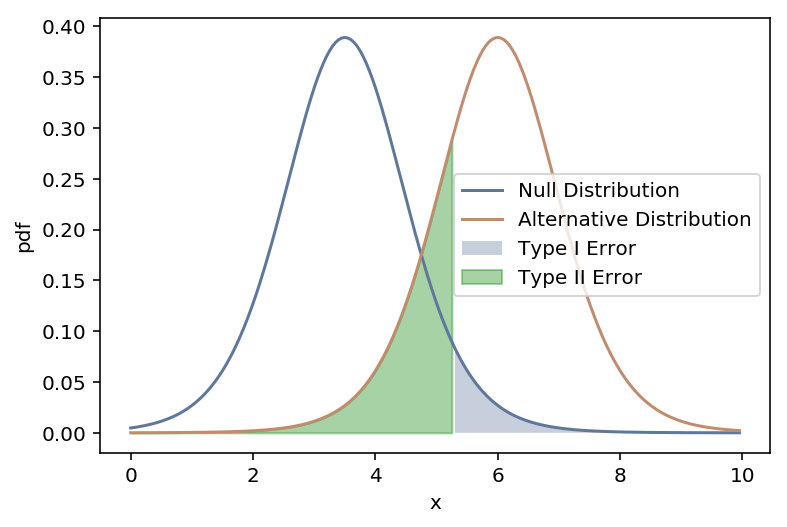

In [17]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

x = np.arange(0,10,.05)

means = np.array([3.5,6])

pdf_h0 = stats.t.pdf(x, 10, means[0], 1)
pdf_h1 = stats.t.pdf(x, 10, means[1], 1)

plt.plot(x, pdf_h0, label='Null Distribution')
plt.plot(x, pdf_h1, label='Alternative Distribution')

alpha = 0.05
t_critical = stats.t.ppf(1-alpha, 11) + means[0]
plt.fill_between(x[x>t_critical], 0*x[x>t_critical], pdf_h0[x>t_critical], alpha=0.35, label='Type I Error')
plt.fill_between(x[x<t_critical], 0*x[x<t_critical], pdf_h1[x<t_critical], alpha=0.35, color='green', label='Type II Error')

plt.xlabel("x")
plt.ylabel("pdf")
plt.legend()
plt.show()

## T-Test

The above scenario is idealistic. In reality we usually don't know the standard deviation  $\sigma$  and have to estimate it. But since our estimate of  $\sigma$ is itself noisy, the test statistic for  $x$  is no longer normal. It follows what is called a Student T distribution. The distribution looks a lot like a Standard Gaussian (a Gaussian with 0 mean and 1 standard deviation) but has wider tails and the same concepts of  $p$ -values and confidence intervals apply but their numerical values are slightly different. The Student T is parameterized by  $\nu$  and approaches a standard Gaussian as  $\nu\to \infty$ . 

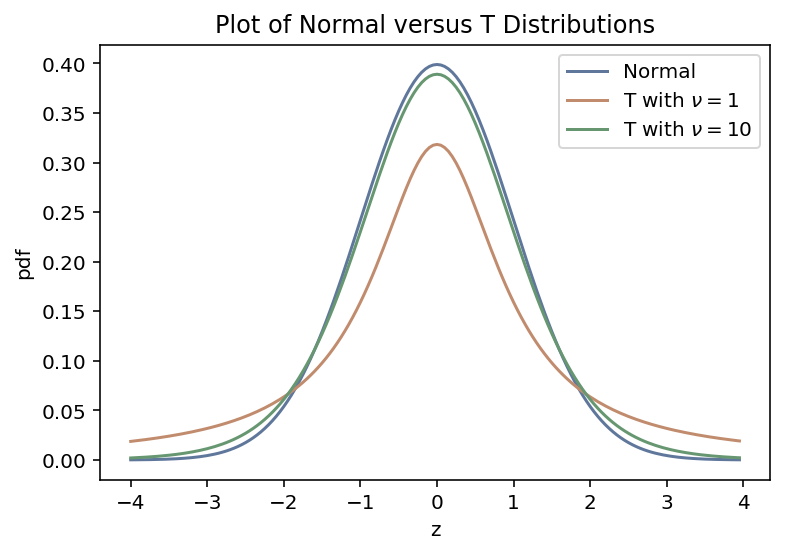

In [18]:
# Below we plot the normal and student t distributions

import numpy as np
import matplotlib.pylab as plt
from scipy import stats

z = np.arange(-4,4,.05)
plt.plot(z, stats.norm.pdf(z), label="Normal")
plt.plot(z, stats.t.pdf(z, 1), label=r"T with $\nu=1$")
plt.plot(z, stats.t.pdf(z, 10), label=r"T with $\nu=10$")
plt.xlabel("z")
plt.ylabel("pdf")
plt.title("Plot of Normal versus T Distributions")
plt.legend()
plt.show()

# Bayesian posterior inference

First let's consider what Bayes rule in general is:

$$ P(A) \; P(B \, | \, A) = P(A \wedge B) = P(B) \; P(A \, | \, B) $$

Bayes' Rule for Bayesian Inference
$$ \; P(\theta \,| \,D)  = \frac{P(D \, | \,  \theta) \; P(\theta)}{P(D)} $$

Where:

$P(\theta)$ is the prior. This is the strength in our belief of $\theta$ without considering the evidence $D$. Our prior view on the probability of how fair the coin is.

$P(\theta \, | \, D)$ is the posterior. This is the (refined) strength of our belief of $\theta$ once the evidence D has been taken into account. After seeing 4 heads out of 8 flips, say, this is our updated view on the fairness of the coin.

$P(D \, | \, \theta)$ is the likelihood. This is the probability of seeing the data D as generated by a model with parameter $\theta$. If we knew the coin was fair, this tells us the probability of seeing a number of heads in a particular number of flips.

$P(D)$ is the evidence. This is the probability of the data as determined by summing (or integrating) across all possible values of $\theta$, weighted by how strongly we believe in those particular values of $\theta$. If we had multiple views of what the fairness of the coin is (but didn't know for sure), then this tells us the probability of seeing a certain sequence of flips for all possibilities of our belief in the coin's fairness.

The entire goal of Bayesian inference is to provide us with a rational and mathematically sound procedure for incorporating our prior beliefs, with any evidence at hand, in order to produce an updated posterior belief. What makes it such a valuable technique is that posterior beliefs can themselves be used as prior beliefs under the generation of new data. Hence Bayesian inference allows us to continually adjust our beliefs under new data by repeatedly applying Bayes' rule.

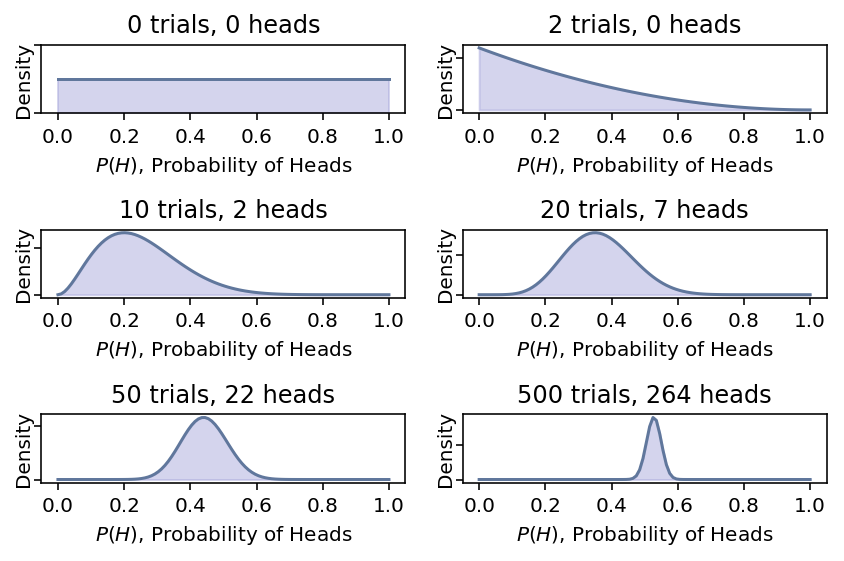

In [14]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt


if __name__ == "__main__":
    # Create a list of the number of coin tosses ("Bernoulli trials")
    number_of_trials = [0, 2, 10, 20, 50, 500]

    # Conduct 500 coin tosses and output into a list of 0s and 1s
    # where 0 represents a tail and 1 represents a head
    data = stats.bernoulli.rvs(0.5, size=number_of_trials[-1])
    
    # Discretise the x-axis into 100 separate plotting points
    x = np.linspace(0, 1, 100)
    
    # Loops over the number_of_trials list to continually add
    # more coin toss data. For each new set of data, we update
    # our (current) prior belief to be a new posterior. This is
    # carried out using what is known as the Beta-Binomial model.
    for i, N in enumerate(number_of_trials):
        # Accumulate the total number of heads for this 
        # particular Bayesian update
        heads = data[:N].sum()

        # Create an axes subplot for each update 
        ax = plt.subplot(len(number_of_trials) / 2, 2, i + 1)
        ax.set_title("%s trials, %s heads" % (N, heads))

        # Add labels to both axes and hide labels on y-axis
        plt.xlabel("$P(H)$, Probability of Heads")
        plt.ylabel("Density")
        if i == 0:
            plt.ylim([0.0, 2.0])
        plt.setp(ax.get_yticklabels(), visible=False)
                
        # Create and plot a  Beta distribution to represent the 
        # posterior belief in fairness of the coin.
        y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
        plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
        plt.fill_between(x, 0, y, color="#aaaadd", alpha=0.5)

    # Expand plot to cover full width/height and show it
    plt.tight_layout()
    plt.show()

## conjugate priors

In Bayes' rule above we can see that the posterior distribution is proportional to the product of the prior distribution and the likelihood function:

$$P(\theta\,|\,D)∝P(D\,|\,\theta)P(\theta)$$

A conjugate prior is a choice of prior distribution, that when coupled with a specific type of likelihood function, provides a posterior distribution that is of the same family as the prior distribution.

The prior and posterior both have the same probability distribution family, but with differing parameters.

Conjugate priors are extremely convenient from a calculation point of view as they provide closed-form expressions for the posterior, thus negating any complex numerical integration.

For the fair coin toss example, if we use a Bernoulli likelihood function AND a beta distribution as the choice of our prior, we immediately know that the posterior will also be a beta distribution.

Using a beta distribution for the prior in this manner means that we can carry out more experimental coin flips and straightforwardly refine our beliefs. The posterior will become the new prior and we can use Bayes' rule successively as new coin flips are generated.

If our prior belief is specified by a beta distribution and we have a Bernoulli likelihood function, then our posterior will also be a beta distribution.
Note however that a prior is only conjugate with respect to a particular likelihood function.

The probability density function of a beta distribution, for our particular parameter $\theta$, is given by:

$$P(\theta \,|\,\alpha ,\, \beta)=\frac{\theta \,^{(\alpha \,−1)}(1−\theta)\,^{\beta −1}}{B(\alpha,\beta)}$$

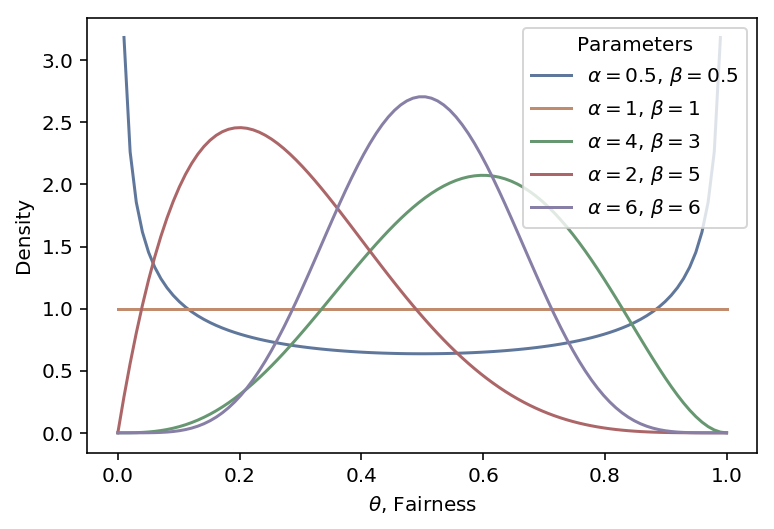

In [15]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
x = np.linspace(0, 1, 100)
params = [
        (0.5, 0.5),
        (1, 1),
        (4, 3),
        (2, 5),
        (6, 6)
]
for p in params:
    y = beta.pdf(x, p[0], p[1])
    plt.plot(x, y, label="$\\alpha=%s$, $\\beta=%s$" % p)
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.legend(title="Parameters")
plt.show()

Mean $\mu$ is given by
$$\mu \, =\, \frac{\alpha}{\alpha\,+\, \beta}$$

While the standard deviation σ is given by:

$$\sigma \, =\sqrt{\frac{\alpha\, \beta }{(\alpha\, + \, \beta)^2(\alpha\, + \, \beta \, +1)}}$$

Hence, all we need to do is re-arrange these formulae to provide $\alpha$ and $\beta$ in terms of $\mu$ and $\sigma$. $\alpha$ is given by:

$$ \alpha \, = \, (\frac{1−\mu}{\sigma^ 2}- \frac{1}{\mu})\mu^2$$
While $\beta$ is given by:

$$\beta=\alpha(\frac{1}{\mu}−1)$$

We are now finally in a position to be able to calculate our posterior beliefs using Bayes' rule.

Bayes' rule in this instance is given by:

$$P(\theta|\,z,\,N)=\frac{P(z\,,N\,|\,\theta)\,P(\theta)}{P(z,N)}$$
This says that the posterior belief in $\theta$, given $z$ heads in $N$ flips, is equal to the likelihood of seeing $z$ heads in $N$ flips, given a fairness $\theta$, multiplied by our prior belief in $\theta$, normalised by the evidence.

As an example, suppose we consider the same prior beliefs as above for $\theta$ with $\mu=0.5$ and $\sigma=0.1$. This gave us the prior belief distribution of $beta(\theta|12,12)$.

Now suppose we observe $N=50$ flips and $z=10$ of them come up heads. How does this change our belief on the fairness of the coin?

We can plug these numbers into our posterior beta distribution to get:

$$beta(\theta\,|z\,+\alpha\,,N−\,z+\,\beta)=\,beta(\theta\,|10+12,\,50−10+12)= beta(\theta\,|22,52)$$
We can plot the prior and posterior belief distributions. I have used a blue dotted line for the prior belief and a green solid line for the posterior:

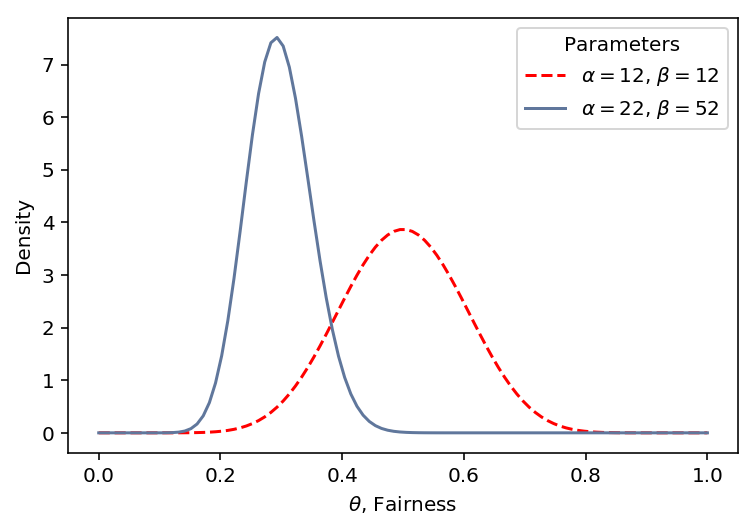

In [19]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
x = np.linspace(0, 1, 100)
prior = (12, 12)
posterior = (22, 52)
y = beta.pdf(x, prior[0], prior[1])
plt.plot(x, y, 'r--',label="$\\alpha=%s$, $\\beta=%s$" % prior)
y = beta.pdf(x, posterior[0], posterior[1])
plt.plot(x, y, label="$\\alpha=%s$, $\\beta=%s$" % posterior)
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.legend(title="Parameters")
plt.show()

## Bayesian posterior sampling


Not all models can make use of conjugate priors and thus calculation of the posterior distribution would need to be approximated numerically. 

In particular, many more complicated modelling situations, particularly those related to hierarchical models with hundreds of parameters, are completely intractable using analytical methods.

Recall the Bayes' Rule. We need to calculate the evidence $P(D)$. In order to achieve this we need to evaluate the following integral, which integrates over all possible values of $\theta$ , the parameters:

$$ P(D)\, =\, \int_{\Theta}^{} P(D,\,\theta)\, d\theta$$

The fundamental problem is that we are often unable to evaluate this integral analytically and so we must turn to a numerical approximation method instead.

An additional problem is that our models might require a large number of parameters. This means that our prior distributions could potentially have a large number of dimensions. This in turn means that our posterior distributions will also be high dimensional. Hence, we are in a situation where we have to numerically evaluate an integral in a potentially very large dimensional space.

The basic idea is to sample from the posterior distribution by combining a "random search" (the Monte Carlo aspect) with a mechanism for intelligently "jumping" around, but in a manner that ultimately doesn't depend on where we started from (the Markov Chain aspect). Hence Markov Chain Monte Carlo methods are memoryless searches performed with intelligent jumps.

The basic recipes for most MCMC algorithms tend to follow this pattern:
1. Begin the algorithm at the current position in parameter space ($\theta_{current}$)
2. Propose a "jump" to a new position in parameter space ($\theta_{new}$)
3. Accept or reject the jump probabilistically using the prior information and available data
4. If the jump is accepted, move to the new position and return to step 1
5. If the jump is rejected, stay where you are and return to step 1
6. After a set number of jumps have occurred, return all of the accepted positions


By doing this we're actually dividing the posterior of the proposed parameter by the posterior of the current parameter. Utilising Bayes' Rule this eliminates the evidence, $P(D)$ from the ratio:

$$\frac{P(\theta_{new}\,|\,D)}{P(\theta_{current}\,|\,D)} \,=\frac{\frac{P(D\,|\,\theta_{new})P(\theta_{new})}{P(D)}}{\frac{P(D|\theta_{current})P(\theta_{current})}{P(D)}}=\, \frac{P(D|\theta_{new})P(\theta_{new})}{P(D|\theta_{current})P(\theta_{current})} $$

logp = -10.252, ||grad|| = 15: 100%|██████████| 7/7 [00:00<00:00, 1874.25it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains: 100%|██████████| 402000/402000 [00:36<00:00, 10962.16draws/s]
The number of effective samples is smaller than 25% for some parameters.


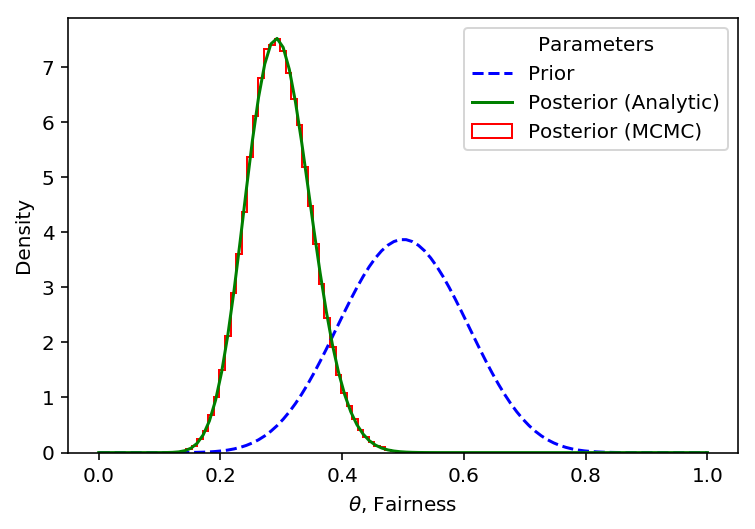

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3
import scipy.stats as stats

# Parameter values for prior and analytic posterior
n = 50
z = 10
alpha = 12
beta = 12
alpha_post = 22
beta_post = 52

# How many iterations of the Metropolis 
# algorithm to carry out for MCMC
iterations = 100000

# Use PyMC3 to construct a model context
basic_model = pymc3.Model()
with basic_model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc3.Beta("theta", alpha=alpha, beta=beta)

    # Define the Bernoulli likelihood function
    y = pymc3.Binomial("y", n=n, p=theta, observed=z)

    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP() 

    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.Metropolis()

    # Calculate the trace
    trace = pymc3.sample(iterations, step, start, random_seed=1, progressbar=True)
    
    # Plot the posterior histogram from MCMC analysis
bins=50
plt.hist(
    trace["theta"], bins, 
    histtype="step", normed=True, 
    label="Posterior (MCMC)", color="red"
)

# Plot the analytic prior and posterior beta distributions
x = np.linspace(0, 1, 100)
plt.plot(
    x, stats.beta.pdf(x, alpha, beta), 
    "--", label="Prior", color="blue"
)
plt.plot(
    x, stats.beta.pdf(x, alpha_post, beta_post), 
    label='Posterior (Analytic)', color="green"
)

# Update the graph labels
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()